# Data loading





In [ ]:
import pandas as pd
try:
    df = pd.read_csv('movie_ratings_dataset.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'movie_ratings_dataset.csv' not found.")
    df = None

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.80,134.63,141.0,NaN,1.0,2.72,No,9.0,25.48,No,Excellent
1,Action,2.27,220.47,98.0,2006.0,1.0,3.46,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.23,52.79,160.0,2010.0,2.0,NaN,NaN,43.0,6.16,No,Excellent
3,Action,8.17,86.41,153.0,2022.0,4.0,5.21,NaN,7.0,2.99,No,Good
4,Romance,6.40,259.57,134.0,1986.0,1.0,8.72,Yes,25.0,0.89,No,Excellent


## Data exploration



In [ ]:
# Data Dimensions
num_data_points = len(df)
num_features = len(df.columns)
print(f"Number of data points: {num_data_points}")
print(f"Number of features: {num_features}")

# Target Variable Identification
target_variable = "Rating_Category"
print(f"\nTarget Variable: {target_variable}")
print(f"Unique values of target variable:\n{df[target_variable].unique()}")

# Prediction Task Type
if df[target_variable].dtype == 'object':
    prediction_task = "Classification"
    print(f"\nPrediction Task: {prediction_task}")
    print("Justification: The target variable is categorical, representing different rating categories.")
else:
    prediction_task = "Regression"
    print(f"\nPrediction Task: {prediction_task}")
    print("Justification: The target variable is numerical, representing a continuous rating value.")

# Feature Types
print("\nFeature Types:")
for col in df.columns:
    if col == target_variable:
        continue
    if df[col].dtype in ['int64', 'float64']:
        feature_type = "Quantitative"
    else:
        feature_type = "Categorical"
    print(f"{col}: {feature_type}")
    if feature_type == "Quantitative":
      print(f"Example values: {df[col].unique()[:5]}")
    else:
      print(f"Example values: {df[col].unique()}")

Number of data points: 1200
Number of features: 12

Target Variable: Rating_Category
Unique values of target variable:
['Excellent' 'Good' 'Average' 'Poor']

Prediction Task: Classification
Justification: The target variable is categorical, representing different rating categories.

Feature Types:
Genre: Categorical
Example values: ['Sci-Fi' 'Action' 'Horror' 'Romance' 'Drama' 'Comedy' nan]
Director_Popularity: Quantitative
Example values: [5.8  2.27 1.23 8.17 6.4 ]
Budget_MillionUSD: Quantitative
Example values: [134.63 220.47  52.79  86.41 259.57]
Runtime_Minutes: Quantitative
Example values: [141.  98. 160. 153. 134.]
Release_Year: Quantitative
Example values: [  nan 2006. 2010. 2022. 1986.]
Num_Main_Actors: Quantitative
Example values: [ 1.  2.  4.  3. nan]
Avg_Actor_Popularity: Quantitative
Example values: [2.72 3.46  nan 5.21 8.72]
Has_Famous_Producer: Categorical
Example values: ['No' 'Yes' nan]
Num_Awards_Won: Quantitative
Example values: [ 9. 17. 43.  7. 25.]
Marketing_Spend_M

## Data analysis




Class Distribution (%):
 Rating_Category
Good         27.000000
Excellent    25.333333
Average      24.500000
Poor         23.166667
Name: proportion, dtype: float64

Majority Class: Good
Minority Class: Poor

Descriptive Statistics:
       Director_Popularity  Budget_MillionUSD  Runtime_Minutes  Release_Year  \
count          1067.000000        1096.000000      1074.000000   1088.000000   
mean              5.452624         152.768723       129.401304   2002.330882   
std               2.600397          85.998943        28.744659     13.068670   
min               1.010000           1.040000        80.000000   1980.000000   
25%               3.310000          78.857500       103.000000   1991.000000   
50%               5.400000         156.060000       130.000000   2002.000000   
75%               7.690000         226.017500       154.000000   2014.000000   
max              10.000000         299.730000       179.000000   2024.000000   

       Num_Main_Actors  Avg_Actor_Popularity 

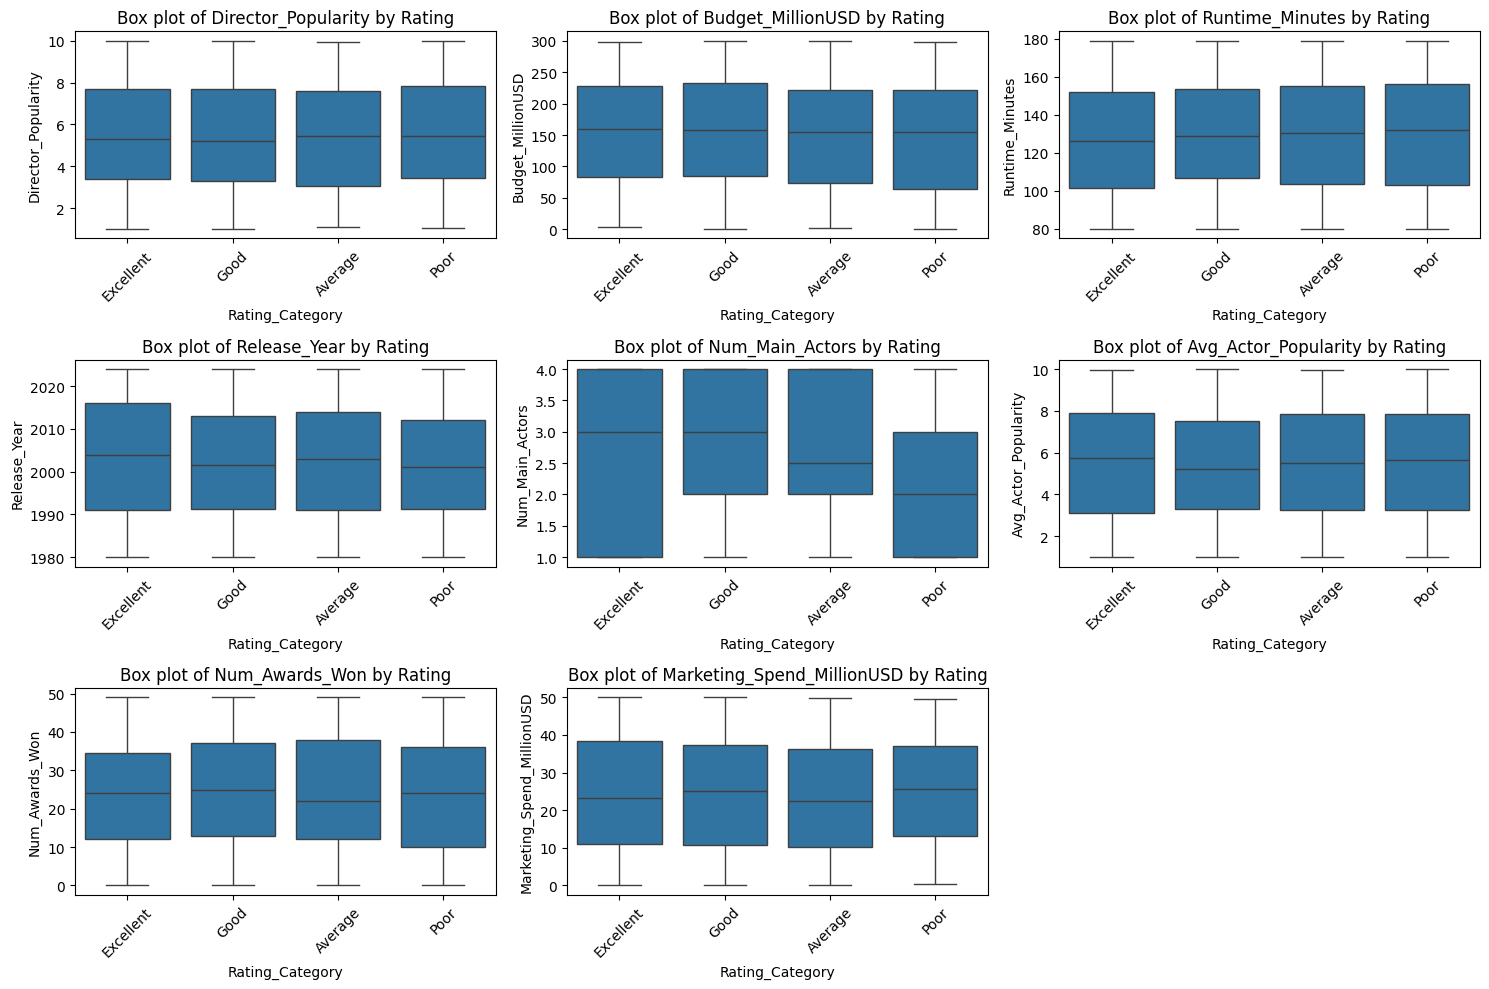

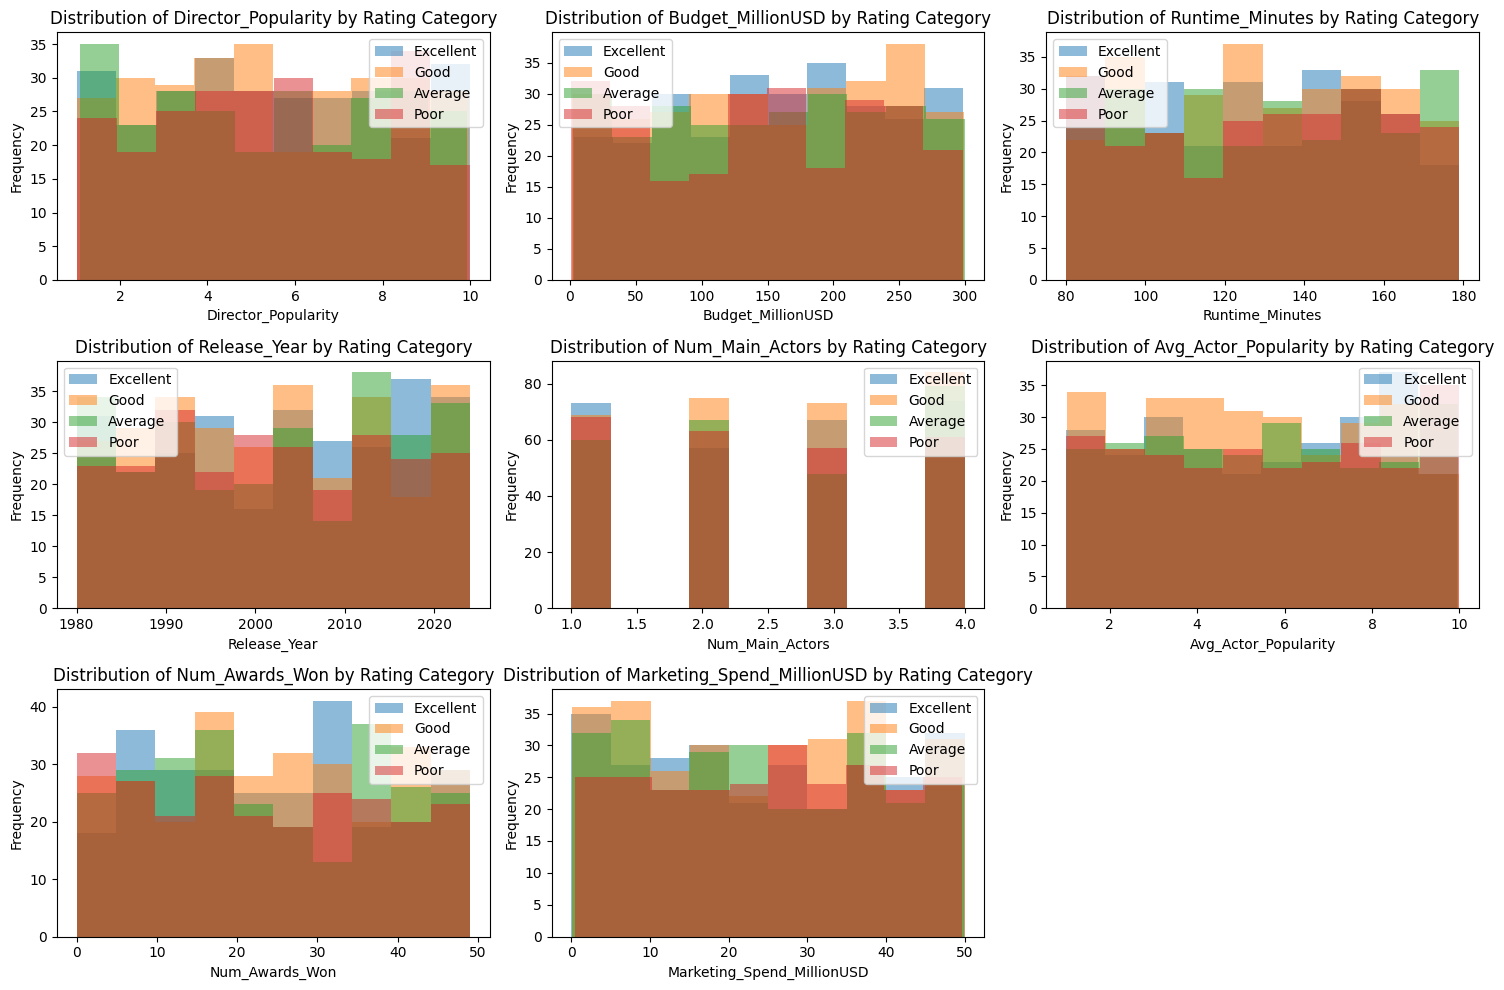

In [ ]:
# Class Distribution Analysis
class_distribution = df['Rating_Category'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)

majority_class = class_distribution.index[0]
minority_class = class_distribution.index[-1]
print(f"\nMajority Class: {majority_class}")
print(f"Minority Class: {minority_class}")


# Exploratory Data Analysis (EDA)
print("\nDescriptive Statistics:")
print(df.describe())

print("\nValue Counts for Categorical Features:")
for column in ['Genre', 'Has_Famous_Producer', 'Is_Sequel', 'Rating_Category']:
    print(f"\n{column}:")
    print(df[column].value_counts())

# Box plots for numerical features grouped by rating category
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Director_Popularity', 'Budget_MillionUSD', 'Runtime_Minutes',
                    'Release_Year', 'Num_Main_Actors', 'Avg_Actor_Popularity',
                    'Num_Awards_Won', 'Marketing_Spend_MillionUSD']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Rating_Category', y=col, data=df)
    plt.title(f'Box plot of {col} by Rating')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Histograms for numerical features grouped by rating category
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  for category in df['Rating_Category'].unique():
    plt.hist(df[df['Rating_Category'] == category][col].dropna(), alpha=0.5, label=category)
  plt.title(f'Distribution of {col} by Rating Category')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.legend()
plt.tight_layout()
plt.show()

Class imbalance Check

In [ ]:
# Checking class distribution in the Rating_Category
class_counts = df['Rating_Category'].value_counts()
class_percentages = df['Rating_Category'].value_counts(normalize=True) * 100

print("Class distribution in Rating_Category:")
print(class_counts)
print("\nClass percentages:")
for class_name, percentage in class_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")

# Calculating imbalance metrics
n_classes = len(class_counts)
max_count = class_counts.max()
min_count = class_counts.min()
imbalance_ratio = max_count / min_count

print(f"\nNumber of classes: {n_classes}")
print(f"Most frequent class: {class_counts.idxmax()} with {max_count} instances")
print(f"Least frequent class: {class_counts.idxmin()} with {min_count} instances")
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")

Class distribution in Rating_Category:
Rating_Category
Good         324
Excellent    304
Average      294
Poor         278
Name: count, dtype: int64

Class percentages:
Good: 27.00%
Excellent: 25.33%
Average: 24.50%
Poor: 23.17%

Number of classes: 4
Most frequent class: Good with 324 instances
Least frequent class: Poor with 278 instances
Imbalance ratio (max/min): 1.17


Class Distribution table

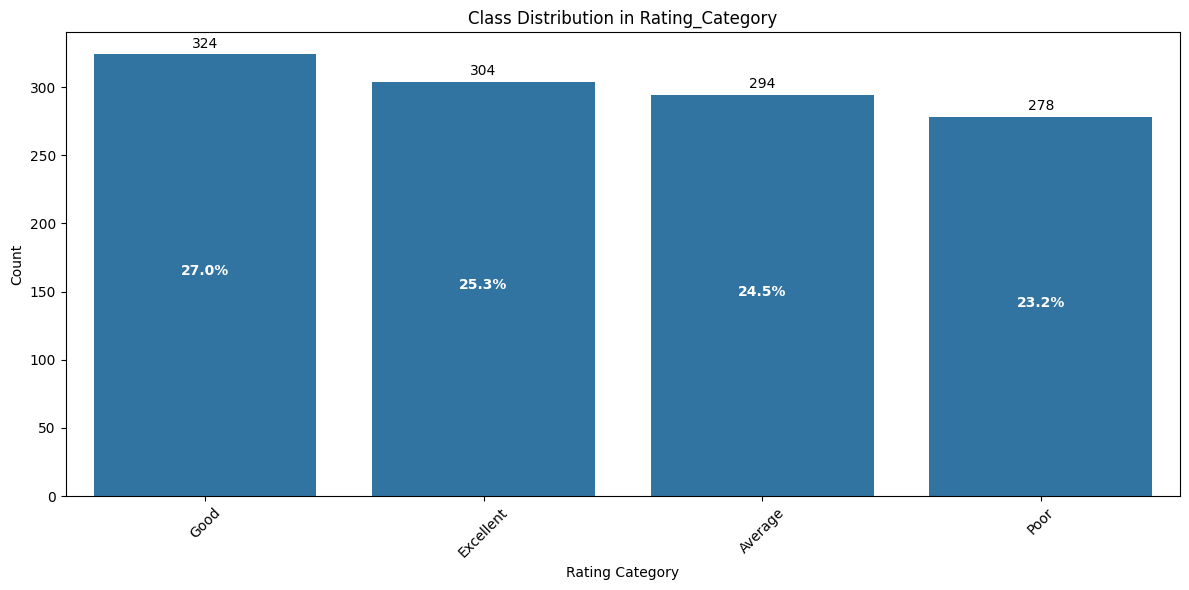


Class distribution is relatively balanced.


In [ ]:
# Creating a bar chart to visualize the class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in Rating_Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding count labels on top of each bar
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 5, str(count), ha='center')

# Add percentage labels inside each bar
for i, (count, percentage) in enumerate(zip(class_counts.values, class_percentages.values)):
    plt.text(i, count/2, f"{percentage:.1f}%", ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

if imbalance_ratio > 10:
    print("\nSEVERE CLASS IMBALANCE DETECTED!")
elif imbalance_ratio > 3:
    print("\nMODERATE CLASS IMBALANCE DETECTED!")
    print("Consider using class weights or evaluation metrics like F1-score.")
else:
    print("\nClass distribution is relatively balanced.")

Feature Corelation graph

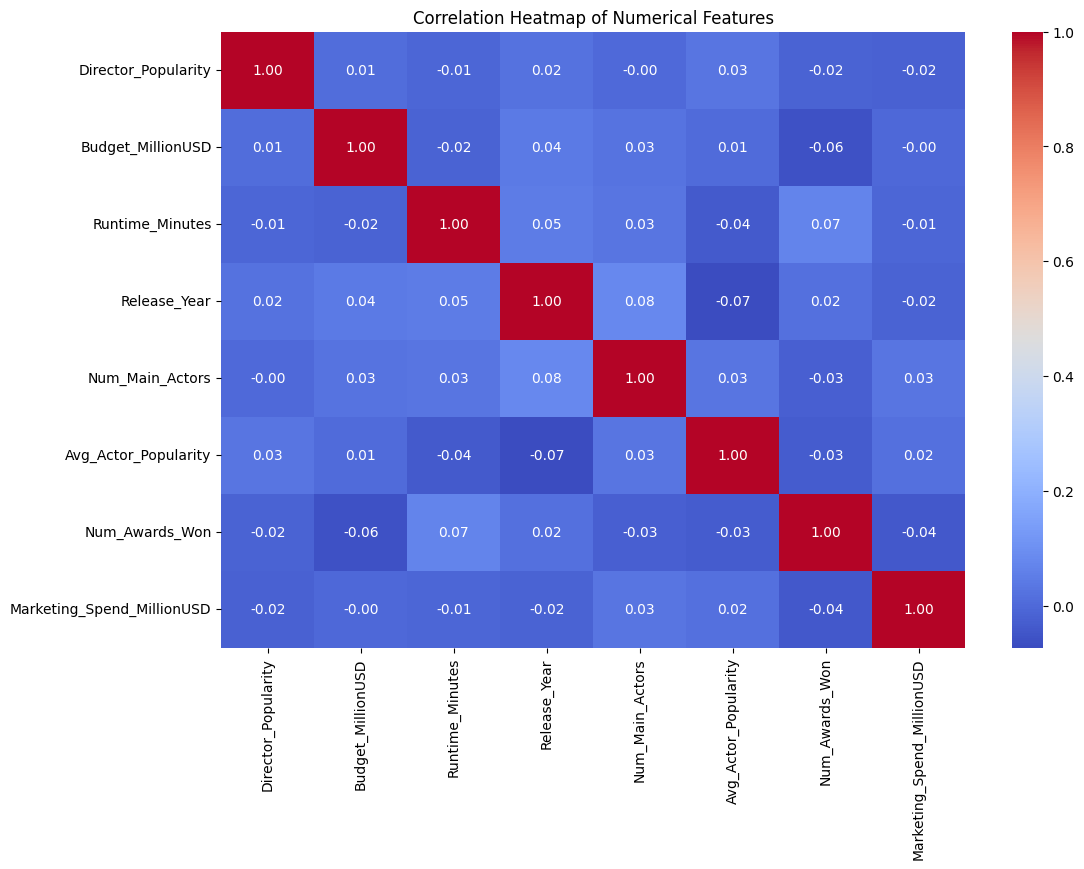

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Data cleaning


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Missing Value Imputation
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create imputers
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent') #Mode

# Fit and transform
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Categorical Feature Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[['Genre', 'Has_Famous_Producer', 'Is_Sequel']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Genre', 'Has_Famous_Producer', 'Is_Sequel']))
df_cleaned = pd.concat([df.drop(['Genre', 'Has_Famous_Producer', 'Is_Sequel'], axis=1), encoded_df], axis=1)

# Data Scaling
scaler = MinMaxScaler()
numerical_cols_to_scale = ['Director_Popularity', 'Budget_MillionUSD', 'Runtime_Minutes', 'Release_Year', 'Num_Main_Actors', 'Avg_Actor_Popularity', 'Num_Awards_Won', 'Marketing_Spend_MillionUSD']
df_cleaned[numerical_cols_to_scale] = scaler.fit_transform(df_cleaned[numerical_cols_to_scale])

display(df_cleaned.head())

,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Num_Awards_Won,Marketing_Spend_MillionUSD,Rating_Category,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Romance,Genre_Sci-Fi,Has_Famous_Producer_No,Has_Famous_Producer_Yes,Is_Sequel_No,Is_Sequel_Yes
0,0.532814,0.447253,0.616162,0.500000,0.000000,0.191111,0.183673,0.509804,Excellent,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.140156,0.734641,0.181818,0.590909,0.000000,0.273333,0.346939,0.182673,Excellent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.024472,0.173257,0.808081,0.681818,0.333333,0.496667,0.877551,0.123249,Excellent,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.796440,0.285815,0.737374,0.954545,1.000000,0.467778,0.142857,0.059824,Good,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.599555,0.865546,0.545455,0.136364,0.000000,0.857778,0.510204,0.017807,Excellent,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Data splitting



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_cleaned.drop('Rating_Category', axis=1)
y = df_cleaned['Rating_Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  #70-30%

## Model training






1.   Neural Network
2.   KNN

3.  Decision Tree
4.  Logistic Regression









In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# 1. Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train_encoded)

# 2. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Experiment with different n_neighbors
knn_model.fit(X_train, y_train_encoded)

# 3. Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5)  # Experiment with different max_depth
dt_model.fit(X_train, y_train_encoded)

# 4. Logistic Regression
lr_model = LogisticRegression(C=1.0, max_iter=1000)  # Experiment with different C values
lr_model.fit(X_train, y_train_encoded)

LogisticRegression(max_iter=1000)

Model Accuracy


In [ ]:
from sklearn.metrics import accuracy_score

# 1. Neural Network (Increased max_iter)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train_encoded)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test_encoded, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy}")

# Evaluate other models and print accuracy
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test_encoded, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test_encoded, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test_encoded, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

Neural Network Accuracy: 0.26666666666666666
KNN Accuracy: 0.2638888888888889
Decision Tree Accuracy: 0.25833333333333336
Logistic Regression Accuracy: 0.2222222222222222


## Model evaluation




Confusion Matrix

Neural Network Accuracy: 0.26666666666666666
KNN Accuracy: 0.2638888888888889
Decision Tree Accuracy: 0.25833333333333336
Logistic Regression Accuracy: 0.2222222222222222

Neural Network Confusion Matrix:
 [[23 25 28 12]
 [19 29 19 24]
 [33 18 27 19]
 [18 21 28 17]]

KNN Confusion Matrix:
 [[37 20 23  8]
 [28 31 18 14]
 [36 29 17 15]
 [29 24 21 10]]

Decision Tree Confusion Matrix:
 [[ 3 25 47 13]
 [ 8 25 43 15]
 [10 24 45 18]
 [ 2 25 37 20]]

Logistic Regression Confusion Matrix:
 [[21 23 28 16]
 [20 24 35 12]
 [33 28 24 12]
 [20 19 34 11]]


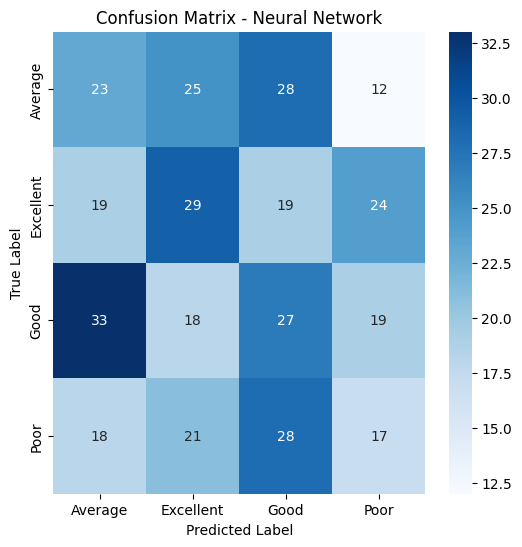

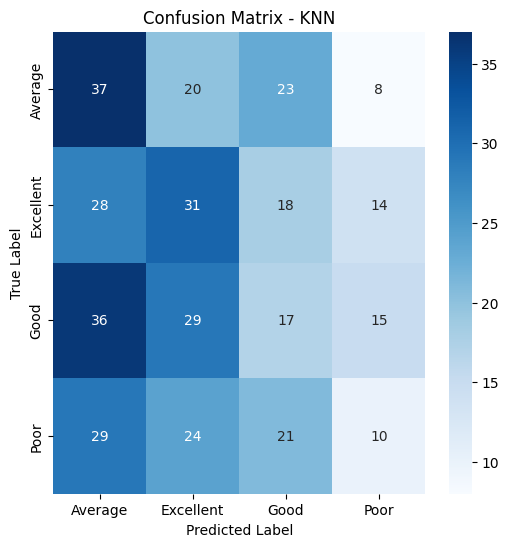

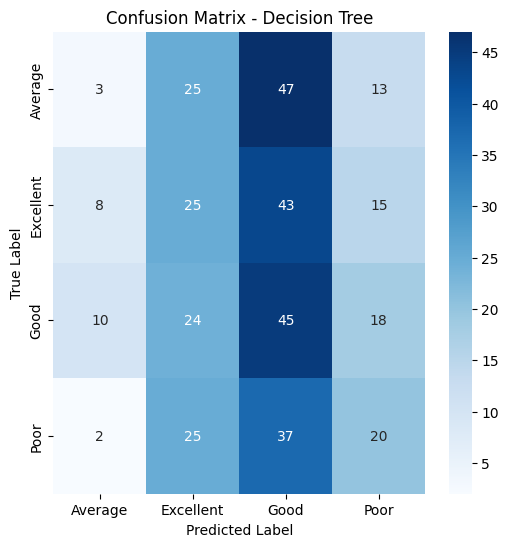

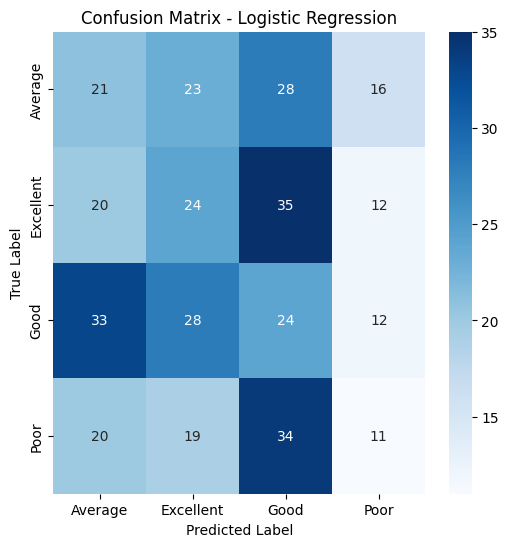

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for each model
nn_predictions = nn_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Accuracy scores
nn_accuracy = accuracy_score(y_test_encoded, nn_predictions)
knn_accuracy = accuracy_score(y_test_encoded, knn_predictions)
dt_accuracy = accuracy_score(y_test_encoded, dt_predictions)
lr_accuracy = accuracy_score(y_test_encoded, lr_predictions)

# Print accuracy scores
print(f"Neural Network Accuracy: {nn_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# Confusion matrices
nn_cm = confusion_matrix(y_test_encoded, nn_predictions)
knn_cm = confusion_matrix(y_test_encoded, knn_predictions)
dt_cm = confusion_matrix(y_test_encoded, dt_predictions)
lr_cm = confusion_matrix(y_test_encoded, lr_predictions)

# Print confusion matrices
print("\nNeural Network Confusion Matrix:\n", nn_cm)
print("\nKNN Confusion Matrix:\n", knn_cm)
print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nLogistic Regression Confusion Matrix:\n", lr_cm)

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(nn_cm, "Neural Network")
plot_confusion_matrix(knn_cm, "KNN")
plot_confusion_matrix(dt_cm, "Decision Tree")
plot_confusion_matrix(lr_cm, "Logistic Regression")

ROC Curve and AUC score

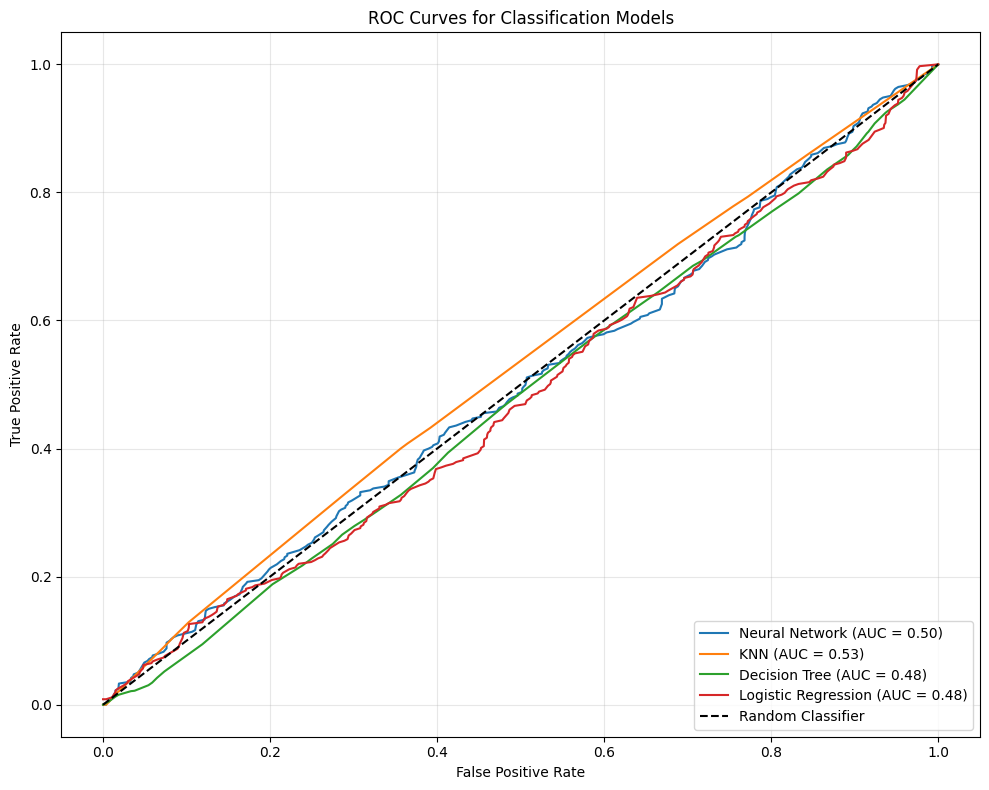

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

models = {
    "Neural Network": nn_model,
    "KNN": knn_model,
    "Decision Tree": dt_model,
    "Logistic Regression": lr_model
}
predictions = {
    "Neural Network": nn_predictions,
    "KNN": knn_predictions,
    "Decision Tree": dt_predictions,
    "Logistic Regression": lr_predictions
}

plt.figure(figsize=(10, 8))

lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)

for model_name, model in models.items():
    try:

        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)

            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            n_classes = len(lb.classes_)

            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

            mean_tpr /= n_classes
            mean_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')

            plt.plot(all_fpr, mean_tpr,
                    label=f'{model_name} (AUC = {mean_auc:.2f})')
        else:

            print(f"{model_name} doesn't support predict_proba, skipping ROC curve")

    except Exception as e:
        print(f"Error calculating ROC for {model_name}: {e}")


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Data visualization



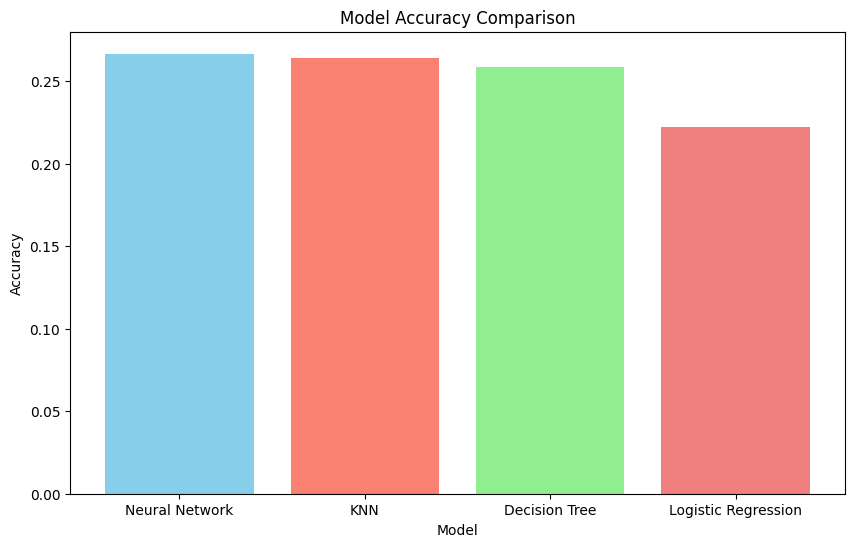

In [ ]:
import matplotlib.pyplot as plt

model_names = ["Neural Network", "KNN", "Decision Tree", "Logistic Regression"]
accuracies = [nn_accuracy, knn_accuracy, dt_accuracy, lr_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.savefig("model_accuracy_comparison.png")
plt.show()

Precision, Recall, F1-score bar chart

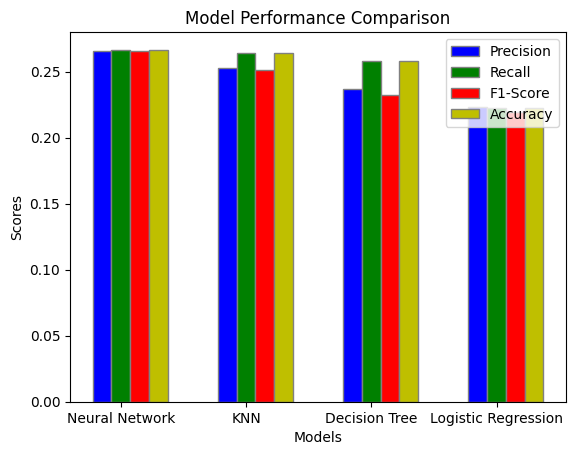

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Neural Network": nn_model,
    "KNN": knn_model,
    "Decision Tree": dt_model,
    "Logistic Regression": lr_model
}

model_names = list(models.keys())
precision = []
recall = []
f1 = []
accuracy = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    precision.append(precision_score(y_test_encoded, y_pred, average='weighted'))
    recall.append(recall_score(y_test_encoded, y_pred, average='weighted'))
    f1.append(f1_score(y_test_encoded, y_pred, average='weighted'))
    accuracy.append(accuracy_score(y_test_encoded, y_pred))

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1, color='r', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='y', width=bar_width, edgecolor='grey', label='Accuracy')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([r + bar_width for r in range(len(models))], model_names)
plt.legend()

# Show the plot
plt.show()